In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [41]:
df=pd.read_csv('heart.csv')

In [42]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect




In [43]:
# column name improved just for understanding

In [44]:
df = df.rename(columns={
    "sex": "gender",
    "cp": "chest_pain_type",
    "trestbps": "resting_bp",
    "chol": "cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "rest_ecg",
    "thalach": "max_heart_rate",
    "exang": "exercise_angina",
    "oldpeak": "st_depression",
    "slope": "st_slope",
    "ca": "num_major_vessels",
    "thal": "thalassemia",
    "target": "heart_disease"
})


In [45]:
df


,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [46]:
df['gender']=df['gender'].map({1:'M',0:'F'})

In [47]:
df.shape

(1025, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   gender               1025 non-null   object 
 2   chest_pain_type      1025 non-null   int64  
 3   resting_bp           1025 non-null   int64  
 4   cholesterol          1025 non-null   int64  
 5   fasting_blood_sugar  1025 non-null   int64  
 6   rest_ecg             1025 non-null   int64  
 7   max_heart_rate       1025 non-null   int64  
 8   exercise_angina      1025 non-null   int64  
 9   st_depression        1025 non-null   float64
 10  st_slope             1025 non-null   int64  
 11  num_major_vessels    1025 non-null   int64  
 12  thalassemia          1025 non-null   int64  
 13  heart_disease        1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [49]:
df.describe()

,age,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
normal_ranges = {
    "resting_bp": "90–120 mmHg (systolic normal), >140 = hypertension",
    "cholesterol": "<200 mg/dL normal, 200–239 borderline, >=240 high",
    "fasting_blood_sugar": "<100 mg/dL normal (fasting); >120 mg/dL = diabetic",
    "rest_ecg": "Categorical (0 = normal, 1 = ST-T abnormality, 2 = LVH)",
    "max_heart_rate": "≈ 220 – age (bpm)",
    "exercise_angina": "0 = No (normal), 1 = Yes (abnormal)",
    "st_depression": "0 = normal; higher indicates ischemia",
    "st_slope": "Categorical (0 = upsloping normal, 1 = flat abnormal, 2 = downsloping abnormal)",
    "num_major_vessels": "0 = normal; 1–3 = abnormal",
    "thalassemia": "Categorical (1 = normal, 2 = fixed defect, 3 = reversible defect)",
    "heart_disease": "0 = no disease (normal), 1 = disease"
}
normal_ranges

{'resting_bp': '90–120 mmHg (systolic normal), >140 = hypertension',
 'cholesterol': '<200 mg/dL normal, 200–239 borderline, >=240 high',
 'fasting_blood_sugar': '<100 mg/dL normal (fasting); >120 mg/dL = diabetic',
 'rest_ecg': 'Categorical (0 = normal, 1 = ST-T abnormality, 2 = LVH)',
 'max_heart_rate': '≈ 220 – age (bpm)',
 'exercise_angina': '0 = No (normal), 1 = Yes (abnormal)',
 'st_depression': '0 = normal; higher indicates ischemia',
 'st_slope': 'Categorical (0 = upsloping normal, 1 = flat abnormal, 2 = downsloping abnormal)',
 'num_major_vessels': '0 = normal; 1–3 = abnormal',
 'thalassemia': 'Categorical (1 = normal, 2 = fixed defect, 3 = reversible defect)',
 'heart_disease': '0 = no disease (normal), 1 = disease'}

In [51]:
# Data Cleaning

In [52]:
df.isnull().sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
st_depression          0
st_slope               0
num_major_vessels      0
thalassemia            0
heart_disease          0
dtype: int64

In [53]:
df

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,M,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,M,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,M,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,F,0,110,254,0,0,159,0,0.0,2,0,2,1


In [54]:
# Data Exploration

In [55]:
df.describe()

,age,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
# Bining

In [57]:
labels=["0-40","40-60","Above 60"]
bins=[0,40,60,100]
df['age']=pd.cut(df.age,bins=bins,labels=labels,right=True)

In [58]:
df=df.rename(columns={"age":"age_group"})

In [59]:
df

,age_group,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,40-60,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,40-60,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,Above 60,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,Above 60,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,Above 60,F,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,40-60,M,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,40-60,M,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,40-60,M,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,40-60,F,0,110,254,0,0,159,0,0.0,2,0,2,1


In [60]:
df_heart_attack=df[df['heart_disease']==1]

In [61]:
print("Total Percentage Distribution for Pateints having heart Attack out of total pateints")
print("Total Percent : ",(len(df_heart_attack)/len(df) )* 100)

Total Percentage Distribution for Pateints having heart Attack out of total pateints
Total Percent :  51.31707317073171


In [62]:
print("Age Group wise Distribution for Pateints with heart attack ")
print("0-40: ",(len(df_heart_attack[df_heart_attack['age_group']=='0-40'])/len(df_heart_attack) )* 100)
print("40-60: ",(len(df_heart_attack[df_heart_attack['age_group']=='40-60'])/len(df_heart_attack) )* 100)
print("Above 60: ",(len(df_heart_attack[df_heart_attack['age_group']=='Above 60'])/len(df_heart_attack) )* 100)
print("Age Gender wise Distribution")
print("Male Percent : ",(len(df_heart_attack[df_heart_attack['gender']=='M'])/len(df_heart_attack) )* 100)
print("Female Percent : ",(len(df_heart_attack[df_heart_attack['gender']=='F'])/len(df_heart_attack) )* 100)

Age Group wise Distribution for Pateints with heart attack 
0-40:  8.555133079847907
40-60:  70.34220532319392
Above 60:  21.102661596958175
Age Gender wise Distribution
Male Percent :  57.03422053231939
Female Percent :  42.96577946768061


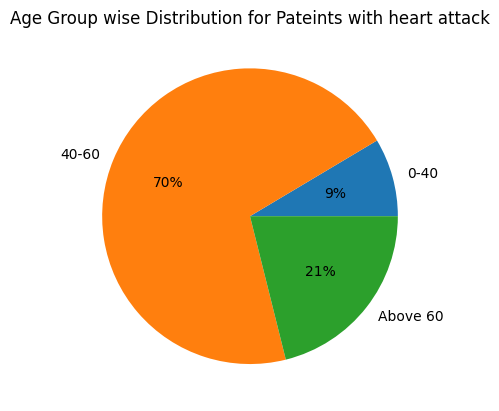

In [63]:
age_0_40 = (len(df_heart_attack[df_heart_attack['age_group'] == '0-40']) / len(df_heart_attack)) * 100
age_40_60 = (len(df_heart_attack[df_heart_attack['age_group'] == '40-60']) / len(df_heart_attack)) * 100
age_above_60 = (len(df_heart_attack[df_heart_attack['age_group'] == 'Above 60']) / len(df_heart_attack)) * 100
data = [age_0_40,age_40_60, age_above_60]
labels = ['0-40', '40-60', 'Above 60']
plt.pie(data,labels=labels, autopct='%.0f%%')
plt.title('Age Group wise Distribution for Pateints with heart attack')
plt.show()

<Axes: xlabel='age_group', ylabel='count'>

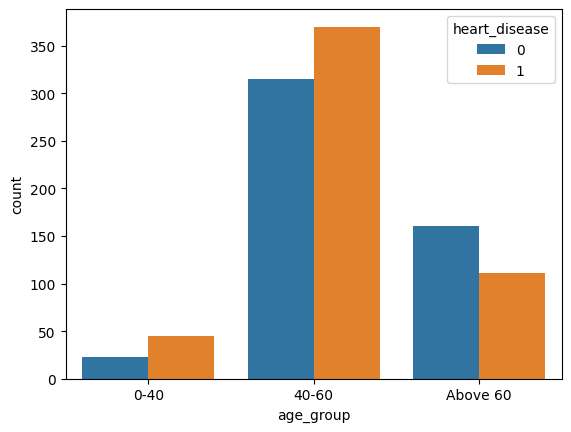

In [64]:
sns.countplot(data=df,x=df.age_group,hue='heart_disease')

1. Maximum Heart Attack Recorded in age groups of (40,60)
2. Minimum Heart Attack Recorded in age groups (0-40)

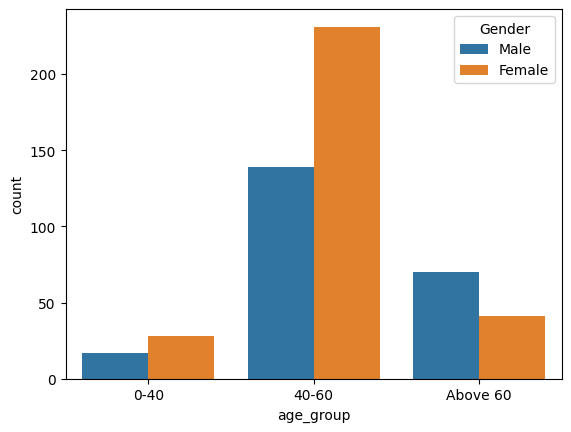

In [65]:
sns.countplot(data=df_heart_attack,x=df_heart_attack.age_group,hue='gender')
plt.legend(title='Gender', labels=['Male', 'Female'])

1. Female Are The maximum one which have highest number of heart attacks ( 30-60 )
2. Female Were Recorded highest for Age group (50-60)
3. Male Were Recorded highest for Age group (30-50)

In [73]:
df_heart_attack['chest_pain_type'].value_counts()

chest_pain_type
2    219
1    134
0    122
3     51
Name: count, dtype: int64

The Person Who had Heart Attack have experienced type 2 chest pain more and type 3 as less

In [74]:
df_corr=df_heart_attack.drop(columns=['age_group','gender','heart_disease','chest_pain_type','exercise_angina','rest_ecg','st_depression','st_slope','num_major_vessels','thalassemia'])

In [75]:
df_heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 5 to 1023
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age_group            526 non-null    category
 1   gender               526 non-null    object  
 2   chest_pain_type      526 non-null    int64   
 3   resting_bp           526 non-null    int64   
 4   cholesterol          526 non-null    int64   
 5   fasting_blood_sugar  526 non-null    int64   
 6   rest_ecg             526 non-null    int64   
 7   max_heart_rate       526 non-null    int64   
 8   exercise_angina      526 non-null    int64   
 9   st_depression        526 non-null    float64 
 10  st_slope             526 non-null    int64   
 11  num_major_vessels    526 non-null    int64   
 12  thalassemia          526 non-null    int64   
 13  heart_disease        526 non-null    int64   
dtypes: category(1), float64(1), int64(11), object(1)
memory usage: 58.2+ KB


In [76]:
df_corr.corr()

,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate
resting_bp,1.000000,0.089431,0.129127,0.030844
cholesterol,0.089431,1.000000,-0.008669,0.006791
fasting_blood_sugar,0.129127,-0.008669,1.000000,-0.035745
max_heart_rate,0.030844,0.006791,-0.035745,1.000000


In [77]:
df_corr.shape

(526, 4)

<Axes: >

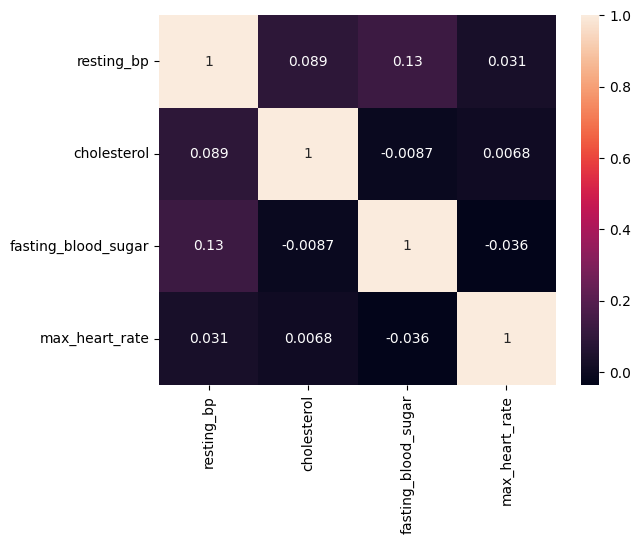

In [78]:
 # This gives a square DataFrame
sns.heatmap(data=df_corr.corr(), annot=True)

1. Strong +ve correlation is found for high Bp and high sugar
2. Strong -ve correlation is found for Chorestrol and Sugar

In [99]:
predictors = ['resting_bp','fasting_blood_sugar','max_heart_rate','cholesterol']
for value in predictors:
   print(f"\n--- {value} ---")
   print(df.groupby("heart_disease")[value].describe())
    


--- resting_bp ---
               count        mean        std    min    25%    50%    75%    max
heart_disease                                                                 
0              499.0  134.106212  18.576736  100.0  120.0  130.0  144.0  200.0
1              526.0  129.245247  16.112188   94.0  120.0  130.0  140.0  180.0

--- fasting_blood_sugar ---
               count      mean       std  min  25%  50%  75%  max
heart_disease                                                    
0              499.0  0.164329  0.370945  0.0  0.0  0.0  0.0  1.0
1              526.0  0.134981  0.342029  0.0  0.0  0.0  0.0  1.0

--- max_heart_rate ---
               count        mean        std   min    25%    50%    75%    max
heart_disease                                                                
0              499.0  139.130261  22.565235  71.0  125.0  142.0  156.0  195.0
1              526.0  158.585551  19.096928  96.0  149.0  161.5  172.0  202.0

--- cholesterol ---
              

The Average Value for max_heart_rate is high hence we can say tha heart rate is strong predictor for heart rate